
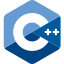
<br>

<div style="text-align:center; font-size:200%;">
 <b>Das Pimpl Idiom</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 06 Das Pimpl Idiom.ipynb -->
<!-- slides/module_470_cpp_patterns/topic_100_pimpl.cpp -->


## Problem

- Die Implementierungsdetails einer Klasse sind Teil der Schnittstelle
- Änderungen an der Implementierung erfordern eine Neukompilierung aller
  Nutzer der Klasse
  - Selbst für private Methoden (wegen Overload-Resolution)


## Lösungsansatz: Pimpl Idiom

- Die Implementierungsdetails werden in eine private Klasse ausgelagert
- Die öffentliche Klasse enthält nur einen Pointer auf die private Klasse
- Die öffentliche Klasse delegiert alle Methodenaufrufe an die private Klasse
- Die private Klasse wird in der `cpp`-Datei definiert


Datei `WidgetV1.h`:

```cpp
#ifndef WIDGETV1_H
#define WIDGETV1_H
#include <memory>

namespace widget_v1 {
class WidgetV1 {
public:
    WidgetV1();
    ~WidgetV1();

    void PrintWidget() const;

    int GetState() const;
    void SetState(int state);

private:
    class Impl;
    std::unique_ptr<Impl> pImpl;
};
} // namespace widget_v1

#endif // WIDGETV1_H
```


Datei `WidgetV1.cpp`:

In [ ]:
#include "WidgetV1.h"

#include <iostream>

In [ ]:
class widget_v1::WidgetV1::Impl {
public:
    void PrintWidget() { std::cout << "Impl::PrintWidget(): " << state_ << "\n"; }

    int GetState() const { return state_; }

    void SetState(int state) { state_ = state; }

private:
    int state_{};
};

In [ ]:
namespace widget_v1 {
widget_v1::WidgetV1::WidgetV1() : pImpl{std::make_unique<Impl>()} {}
} // namespace widget_v1

In [ ]:
namespace widget_v1 {
WidgetV1::~WidgetV1() = default;
}

In [ ]:
void widget_v1::WidgetV1::PrintWidget() const { pImpl->PrintWidget(); }

In [ ]:
void widget_v1::WidgetV1::SetState(int state) { pImpl->SetState(state); }

In [ ]:
int widget_v1::WidgetV1::GetState() const { return pImpl->GetState(); }

In [ ]:
using widget_v1::WidgetV1;

WidgetV1 w;
w.PrintWidget();
w.SetState(42);
std::cout << "State is: " << w.GetState() << std::endl;
w.PrintWidget();

In [ ]:
using widget_v1::WidgetV1;
const WidgetV1 w;
w.PrintWidget();
// w.SetState(42);
std::cout << "State is: " << w.GetState() << std::endl;
w.PrintWidget();


### Vorteile

- Die Implementierungsdetails sind nicht Teil der Schnittstelle
- Änderungen an der Implementierung erfordern keine Neukompilierung der
  Nutzer der Klasse


### Probleme

- Runtime Overhead
  - Speicher für Pointer
  - Indirekter Zugriff auf Daten
  - Daten werden auf dem Heap statt auf dem Stack gespeichert
     - Dies ist typischerweise der größte Overhead
- Erhöhter Wartungs- und Entwicklungsaufwand
- Die Klasse ist nicht kopierbar
- `Const-ness` wird nicht korrekt zum `pImpl` Pointer propagiert


Datei `WidgetV2.h`:


Datei `WidgetV2.cpp`:

In [ ]:
#include "WidgetV2.h"

#include <iostream>

In [ ]:
class widget_v2::WidgetV2::Impl {
public:
    void PrintWidget() const {
        std::cout << "Impl::PrintWidget() const: " << state_ << "\n";
    }

    void PrintWidget() { std::cout << "Impl::PrintWidget(): " << state_ << "\n"; }

    int GetState() const {
        std::cout << "<Impl::GetState() const -> " << state_ << "> ";
        return state_;
    }

    int& GetState() {
        std::cout << "<Impl::GetState() -> " << state_ << "> ";
        return state_;
    }

    void SetState(int state) { state_ = state; }

private:
    int state_{};
};

In [ ]:
namespace widget_v2 {
WidgetV2::WidgetV2() : pImpl{std::make_unique<Impl>()} {}
} // namespace widget_v2

In [ ]:
namespace widget_v2 {
WidgetV2::~WidgetV2() = default;
}

In [ ]:
void widget_v2::WidgetV2::PrintWidget() const { pImpl->PrintWidget(); }

In [ ]:
void widget_v2::WidgetV2::SetState(int state) { pImpl->SetState(state); }

In [ ]:
int widget_v2::WidgetV2::GetState() const { return pImpl->GetState(); }

In [ ]:
int& widget_v2::WidgetV2::GetState() { return pImpl->GetState(); }

In [ ]:
using widget_v2::WidgetV2;

WidgetV2 w;
w.PrintWidget();
w.SetState(42);
std::cout << "State is: " << w.GetState() << std::endl;
w.PrintWidget();

In [ ]:
using widget_v2::WidgetV2;
const WidgetV2 w;
w.PrintWidget();
// w.SetState(42);
std::cout << "State is: " << w.GetState() << std::endl;
w.PrintWidget();


### Propagation von `const`

- Es ist möglich, die `const`-Qualifizierung auf den `pImpl` Pointer zu propagieren
- Allerdings ist die entsprechende Template nicht im C++-Standard definiert
- Eine entsprechende Implementierung ist als Header im Code enthalten


Datei `WidgetV3.h`:

In [ ]:
#include "WidgetV3.h"


Datei `WidgetV3.cpp`:

In [ ]:
#include "WidgetV3.h"

#include <iostream>

In [ ]:
namespace widget_v3 {
class WidgetV3::Impl {
public:
    void PrintWidget() const {
        std::cout << "Impl::PrintWidget() const: " << state_ << "\n";
    }

    void PrintWidget() { std::cout << "Impl::PrintWidget(): " << state_ << "\n"; }

    int GetState() const {
        std::cout << "<Impl::GetState() const -> " << state_ << "> ";
        return state_;
    }

    int& GetState() {
        std::cout << "<Impl::GetState() -> " << state_ << "> ";
        return state_;
    }

    void SetState(int state) { state_ = state; }

private:
    int state_{};
};
} // namespace widget_v3

In [ ]:
namespace widget_v3 {
WidgetV3::WidgetV3() : pImpl{std::make_unique<Impl>()} {}
} // namespace widget_v3

In [ ]:
namespace widget_v3 {
WidgetV3::~WidgetV3() = default;
}

In [ ]:
void widget_v3::WidgetV3::PrintWidget() const { pImpl->PrintWidget(); }

In [ ]:
void widget_v3::WidgetV3::SetState(int state) { pImpl->SetState(state); }

In [ ]:
int widget_v3::WidgetV3::GetState() const { return pImpl->GetState(); }

In [ ]:
int& widget_v3::WidgetV3::GetState() { return pImpl->GetState(); }

In [ ]:
using widget_v3::WidgetV3;

WidgetV3 w;
w.PrintWidget();
w.SetState(42);
std::cout << "State is: " << w.GetState() << std::endl;
w.PrintWidget();

In [ ]:
using widget_v3::WidgetV3;
const WidgetV3 w;
w.PrintWidget();
// w.SetState(42);
std::cout << "State is: " << w.GetState() << std::endl;
w.PrintWidget();